# Surface measurements

In this notebook we demonstrate how to retrieve surface/vertex measurements in a table and how to visualize them on the surface. The used example data is derived from [AV Luque and JV Veenvliet (2023)](https://zenodo.org/record/7603081#.Y94N4XbMJmN) licensed [CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode). See the [creating_surfaces notebook](creating_surfaces.ipynb) for how to create the surface from raw imaging data.

See also
* [vedo library](https://vedo.embl.es/)
* [vedo add curvature documentation](https://vedo.embl.es/autodocs/content/vedo/mesh.html?highlight=curvature#vedo.mesh.Mesh.addCurvatureScalars)

In [1]:
import napari
import matplotlib.pyplot as plt
from napari.utils import nbscreenshot
import numpy as np
import vedo
from napari_process_points_and_surfaces import add_curvature, Curvature, spherefitted_curvature
import napari_process_points_and_surfaces as nppas

import vedo

In [2]:
viewer = napari.Viewer(ndisplay=3)
viewer.camera.angles = (40, -30, 55)

In [3]:
surface = nppas.gastruloid()

The nppas gastruloid example is derived from AV Luque and JV Veenvliet (2023) which is licensed CC-BY (https://creativecommons.org/licenses/by/4.0/legalcode) and can be downloaded from here: https://zenodo.org/record/7603081


## Surface visualization
The surface itself does not come with any quantification. It looks like this:

(array([[ 14.174363, 220.40599 , 224.08286 ],
        [ 13.983076, 208.15877 , 220.32153 ],
        [ 14.819012, 219.06023 , 229.4558  ],
        ...,
        [112.18208 , 356.98364 , 430.36832 ],
        [112.3784  , 360.45856 , 421.8425  ],
        [112.865425, 352.2561  , 422.1735  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64))
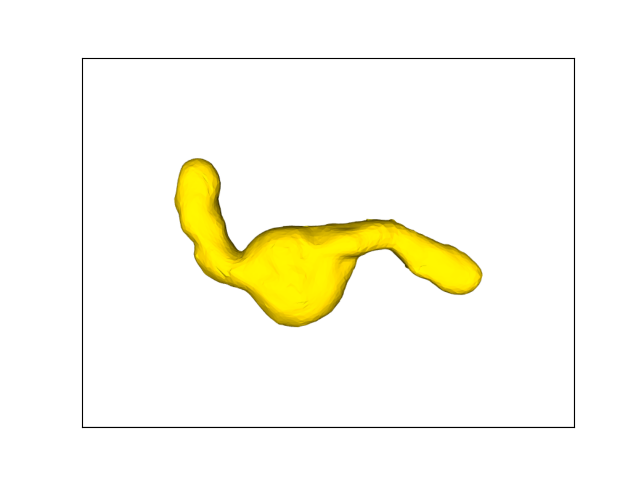

In [4]:
surface

## Quantification
We can create a table ([pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)) like this.

In [5]:
requested_measurements = [nppas.Quality.AREA, 
                          nppas.Quality.ASPECT_RATIO,
                          nppas.Quality.GAUSS_CURVATURE, 
                          nppas.Quality.MEAN_CURVATURE,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_DECA_VOXEL,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_KILO_VOXEL,
                         ]

df = nppas.surface_quality_table(surface, requested_measurements)
df

,vertex_index,Quality.AREA,Quality.ASPECT_RATIO,Quality.GAUSS_CURVATURE,Quality.MEAN_CURVATURE,Quality.SPHERE_FITTED_CURVATURE_DECA_VOXEL,Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL,Quality.SPHERE_FITTED_CURVATURE_KILO_VOXEL
0,0,29.997389,1.600400,0.030287,0.000490,0.000691,0.000257,0.000019
1,1,46.087046,1.602183,0.011136,0.000018,NaN,0.000250,0.000019
2,2,35.886338,1.400599,0.012633,0.000142,0.000542,0.000253,0.000019
3,3,22.887296,1.751932,0.036979,0.000548,0.000339,0.000379,0.000019
4,4,29.952347,1.220882,0.010277,0.000047,0.000366,0.000391,0.000019
...,...,...,...,...,...,...,...,...
3319,3319,25.079661,1.340802,0.031878,0.000606,0.001081,0.000168,0.000019
3320,3320,47.213916,1.254924,0.004615,0.000003,NaN,0.000169,0.000019
3321,3321,35.964707,1.140267,0.015661,0.000198,0.000547,0.000163,0.000019
3322,3322,45.673529,1.189562,0.011380,0.000100,0.000026,0.000152,0.000019


To get an overview about measurements, we can summarize them:

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vertex_index,3324.0,1661.500000,959.700474,0.000000e+00,830.750000,1661.500000,2492.250000,3323.000000
Quality.AREA,3324.0,33.753233,10.790780,5.677486e+00,26.694735,32.956835,39.255080,125.564101
Quality.ASPECT_RATIO,3324.0,7.126810,89.909602,1.038034e+00,1.292444,1.437911,1.648299,3421.965459
Quality.GAUSS_CURVATURE,3324.0,0.016958,0.035275,-1.031106e+00,0.005509,0.013645,0.024739,0.348243
Quality.MEAN_CURVATURE,3324.0,0.000383,0.007653,-2.803460e-02,-0.000135,0.000010,0.000270,0.426018
Quality.SPHERE_FITTED_CURVATURE_DECA_VOXEL,2750.0,0.002875,0.004761,1.791201e-09,0.000341,0.001004,0.003054,0.043508
Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL,3324.0,0.000258,0.000069,1.516446e-04,0.000214,0.000241,0.000275,0.000545
Quality.SPHERE_FITTED_CURVATURE_KILO_VOXEL,3324.0,0.000019,0.000000,1.853513e-05,0.000019,0.000019,0.000019,0.000019


We can extract a single column for the table as list.

In [7]:
curvature = list(df['Quality.SPHERE_FITTED_CURVATURE_HECTA_VOXEL'])
curvature[:5]

[0.0002572409502622459,
 0.0002504286604301336,
 0.00025319922419934937,
 0.00037887302369609083,
 0.00039058361737075804]

## Visualizing measurements
To visualize the measurements, we need to attach them to the surface:

(array([[ 14.174363, 220.40599 , 224.08286 ],
        [ 13.983076, 208.15877 , 220.32153 ],
        [ 14.819012, 219.06023 , 229.4558  ],
        ...,
        [112.18208 , 356.98364 , 430.36832 ],
        [112.3784  , 360.45856 , 421.8425  ],
        [112.865425, 352.2561  , 422.1735  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    4,    7],
        ...,
        [3318, 3317, 3316],
        [3316, 3323, 3318],
        [3318, 3323, 3319]], dtype=int64),
 [0.0002572409502622459,
  0.0002504286604301336,
  0.00025319922419934937,
  0.00037887302369609083,
  0.00039058361737075804,
  0.0003600190769892588,
  0.0003812024121276196,
  0.0004032213994721877,
  0.00026615657793863437,
  0.00027205340748381396,
  0.0002614592926650137,
  0.0002535430610115366,
  0.0002444765111638357,
  0.0002573608283640385,
  0.00025511530868667414,
  0.0004272923050341968,
  0.00040987382053132507,
  0.00041509675552257603,
  0.0003926723802985403,
  0.0003564980324540298,
  0.0003623340736194096,
  0.00033555980471592983,
  0.0003317364998374916,
  0.0002921858820893961,
  0.0002892736862261418,
  0.00027213123062221344,
  0.0002739698532122773,
  0.00025648820850162154,
  0.00026122497221375764,
  0.00024782755218819214,
  0.0002649861975374232,
  0.00026065427276901183,
  0.00025244832393795237,
  0.00019891824369307795,
  0.00020176570801880932,
  0.00020818338902591803,
  0.00018501914963072087,
  0.00020767594689551926,
  0.00016904129858439523,
  0.00016712948796036094,
  0.00016842769309972517,
  0.0001751982557912654,
  0.0001731369728536228,
  0.00016952163872836523,
  0.000170649889272481,
  0.00018770825158857248,
  0.00018521431489318174,
  0.00019235238150829454,
  0.00019944375347912574,
  0.00019322146916632733,
  0.00042728800312801315,
  0.00036595568013041336,
  0.00031320856763767855,
  0.00034012045863710265,
  0.0003050005826347762,
  0.0003164459041932456,
  0.00031649243860784517,
  0.00027174891061767636,
  0.00029662462724188864,
  0.0002696932569205914,
  0.0002444676930201564,
  0.0002621616186653647,
  0.00026243819527401125,
  0.00025959623392583136,
  0.00025367576832567974,
  0.00021426165097631434,
  0.00021748433662969354,
  0.00020409808637693932,
  0.00021400356548413585,
  0.0001921425944834943,
  0.00020509266063909186,
  0.00018253946206721675,
  0.00017454589420488024,
  0.00017135001431061556,
  0.0001769410406399325,
  0.00017555981577485697,
  0.00017827199115258026,
  0.0001703851425855177,
  0.00016902580168181794,
  0.0001762321945163552,
  0.00017687534888938706,
  0.0001705892258722087,
  0.00017349616890782797,
  0.00017501710140030425,
  0.0001711842334784097,
  0.00016930807656340564,
  0.00017071925196267146,
  0.00017425498392505828,
  0.00017100156134874575,
  0.0001716349011546965,
  0.0001790206863094092,
  0.00019059228511976467,
  0.00019238854230643572,
  0.00018288453196148272,
  0.0001836472132901217,
  0.00018684970100970558,
  0.00018964790911978177,
  0.00020123963422510893,
  0.00019707816680708513,
  0.0002078212392407102,
  0.00021144493983045272,
  0.00020766151378358928,
  0.00043871883709428906,
  0.00040097676857697105,
  0.00040662380031037033,
  0.0004314457029678715,
  0.0003590238662584835,
  0.00033060318372179733,
  0.0003245627629890231,
  0.00030022028491949373,
  0.0002906755126752112,
  0.0003200366450220646,
  0.00026208411361707375,
  0.00026167378368374976,
  0.0002676546483723617,
  0.00026423069699332526,
  0.0002521125183349993,
  0.0002562409452488081,
  0.00026524211845965203,
  0.00025775642775682767,
  0.000252782607215831,
  0.00025110836335157923,
  0.00025872755321448306,
  0.00025254256576958366,
  0.00022029583494938282,
  0.00022296007794809223,
  0.00022531952897482963,
  0.0001959227869320106,
  0.00018939128164285746,
  0.0001976808850114822,
  0.00019178025721304924,
  0.00018047807205775408,
  0.00019168217514391398,
  0.00018546494971022982,
  0.00017275094305277872,
  0.00017394261253750388,
  0.0001721
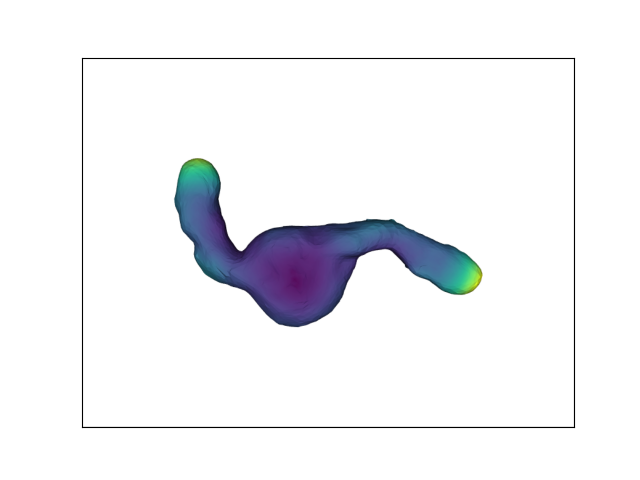
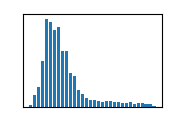

In [8]:
quantified_surface = nppas.set_vertex_values(surface, curvature)
quantified_surface

The visualization can be customized as well, e.g. by changing the view angle and the colormap.

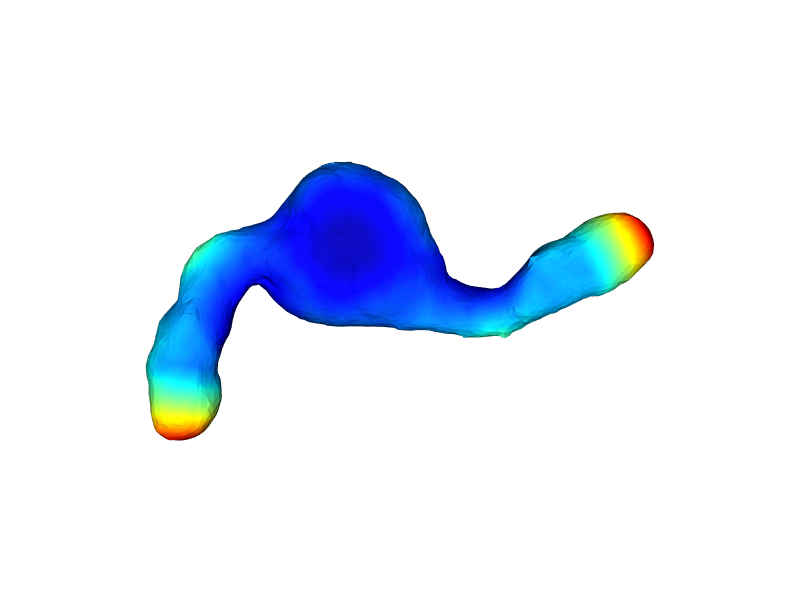

In [9]:
nppas.show(quantified_surface, azimuth=-90, cmap='jet')

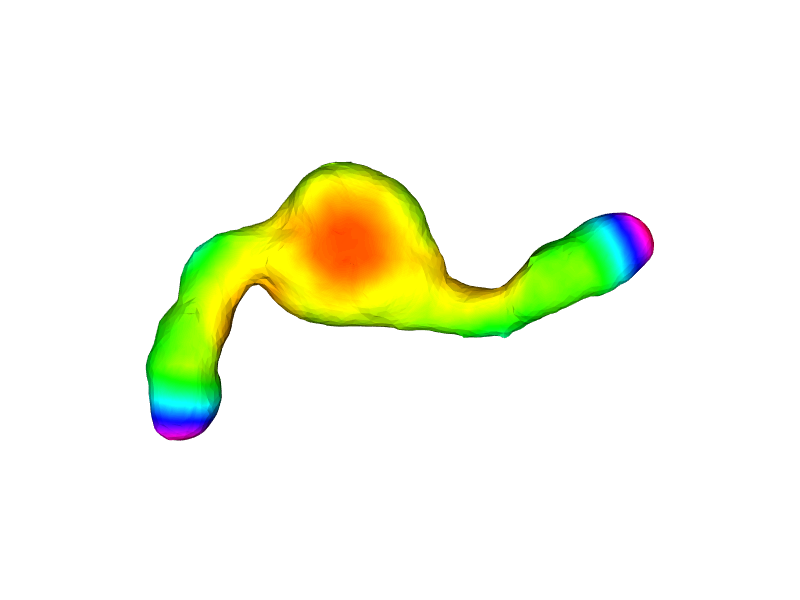

In [10]:
nppas.show(quantified_surface, azimuth=-90, cmap='hsv')